In [10]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm 
import statsmodels.tools
import seaborn as sns #pretty visualisations
import matplotlib.pyplot as plt

In [11]:
# Read in data
df = pd.read_csv('Life Expectancy Data.csv')

In [14]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [24]:
# Check for nulls
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [27]:
# Check Datatypes 
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [33]:
# Check number of observations
df.shape

(2864, 21)

In [40]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


## Train Test Split

In [43]:
# Allocate features and target column
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')

In [49]:
# Assign to X and y
X = df[feature_cols]
y = df['Life_expectancy']

In [51]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split (X,  y, test_size = 0.2, random_state = 10)

In [67]:
# check split worked
print(X_train.shape)
print(y_test.shape)

(2291, 20)
(573,)


In [59]:
#X_train.shape[0] == y_train.shape[0]
X_test.shape[0] == y_test.shape[0]

True

In [69]:
X_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
1680,Tajikistan,Asia,2007,41.7,48.8,151.8545,0.54,84,90,24.8,85,86,0.10,699,7.06,3.8,3.8,10.5,0,1
2675,Burundi,Africa,2003,85.7,138.1,353.0270,6.37,87,57,20.8,75,82,1.09,298,6.91,8.5,8.5,2.1,0,1
2247,Bulgaria,European Union,2014,7.3,8.7,139.2615,10.30,95,89,26.3,88,88,0.03,6797,7.22,1.9,1.9,10.9,1,0
2088,Norway,Rest of Europe,2011,2.5,3.1,64.7610,6.44,88,94,26.4,94,94,0.04,72195,4.95,0.7,0.7,12.8,1,0
2331,Equatorial Guinea,Africa,2014,69.9,96.8,327.5505,8.64,53,64,23.9,55,20,4.04,12927,1.12,8.5,8.4,5.5,0,1


## Feature Engineering 

In [143]:
def feature_eng (df):
    df = df.copy()
    df = df.drop(columns = ['Country'])
    df = df.drop(columns = ['Economy_status_Developing'])
    ##one hot encoding method
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype=int) 
    df = sm.add_constant(df)
    return df

In [145]:
X_train_fe = feature_eng(X_train)

In [147]:
X_train_fe

,const,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developed,Economy_status_Developing,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
1680,1.0,2007,41.7,48.8,151.8545,0.540,84,90,24.8,85,...,0,1,1,0,0,0,0,0,0,0
2675,1.0,2003,85.7,138.1,353.0270,6.370,87,57,20.8,75,...,0,1,0,0,0,0,0,0,0,0
2247,1.0,2014,7.3,8.7,139.2615,10.300,95,89,26.3,88,...,1,0,0,0,1,0,0,0,0,0
2088,1.0,2011,2.5,3.1,64.7610,6.440,88,94,26.4,94,...,1,0,0,0,0,0,0,0,1,0
2331,1.0,2014,69.9,96.8,327.5505,8.640,53,64,23.9,55,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,1.0,2014,24.9,29.9,166.2535,1.510,81,65,29.6,76,...,0,1,0,0,0,0,0,1,0,0
1180,1.0,2003,54.3,72.3,159.3365,0.003,75,63,20.4,90,...,0,1,1,0,0,0,0,0,0,0
1344,1.0,2005,63.6,86.8,243.8070,3.690,49,65,21.6,50,...,0,1,1,0,0,0,0,0,0,0
527,1.0,2012,40.9,52.0,185.2720,3.040,73,36,21.5,79,...,0,1,1,0,0,0,0,0,0,0


## EDA

In [155]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


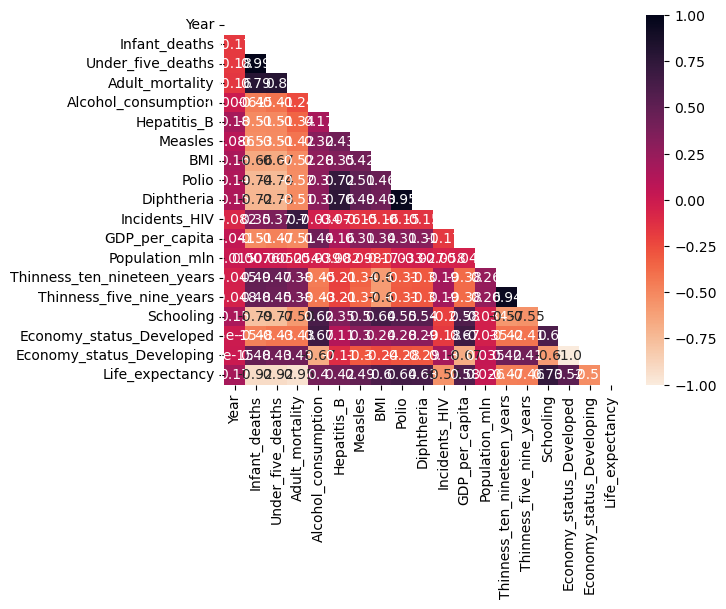

In [31]:
## Correlations
sns.heatmap(df.corr(numeric_only = True), 
            annot = True,
           cmap = 'rocket_r',
           vmin = -1,
           vmax = 1,
           fmt = '.2',
           mask = np.triu(df.corr(numeric_only = True)))

plt.show()

### BMI

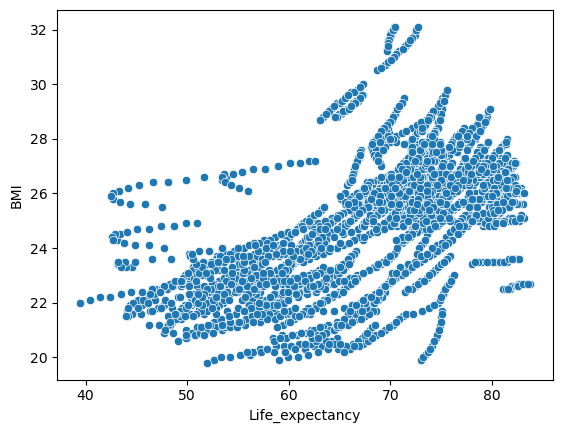

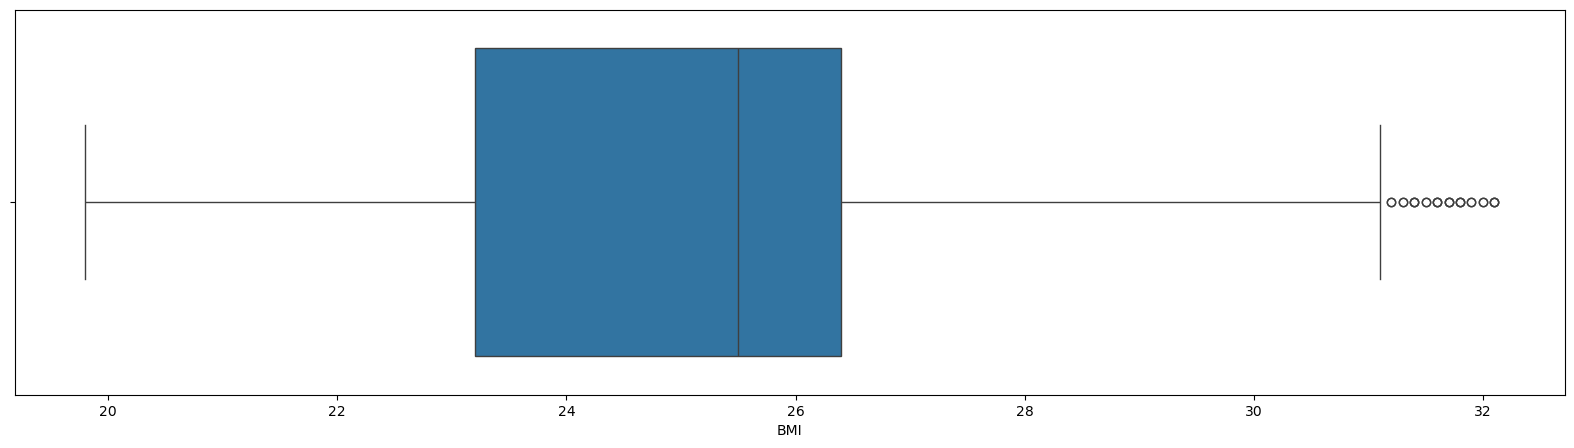

In [26]:
# Scatterplot of BMI vs Life Expectancy
sns.scatterplot(data = df, x = 'Life_expectancy', y= 'BMI')
plt.show()

# Boxplot of BMI 
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['BMI'],
            orient = 'h')
plt.show()

### GDP_per_capita
* Exponential curve
* Will need transforming - log

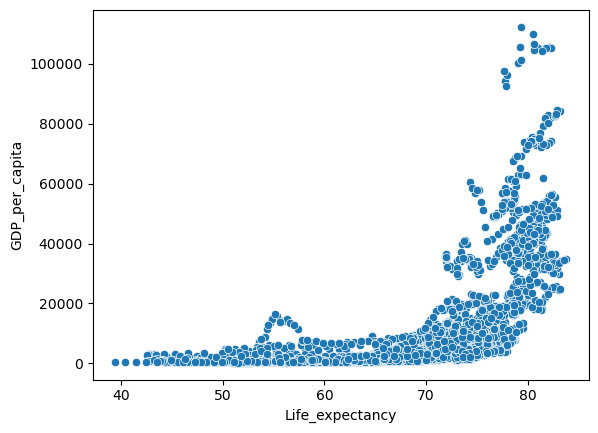

In [15]:
sns.scatterplot(data = df, x= 'Life_expectancy', y = 'GDP_per_capita')
plt.show()

### Schooling
* Relatively strong correlation

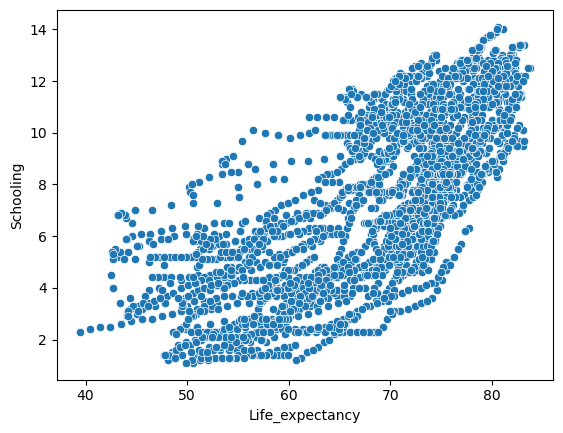

In [228]:
sns.scatterplot(data =df, x ='Life_expectancy',y='Schooling')
plt.show()

### Polio

* unsure on whether this is linear really?
* Some outliers

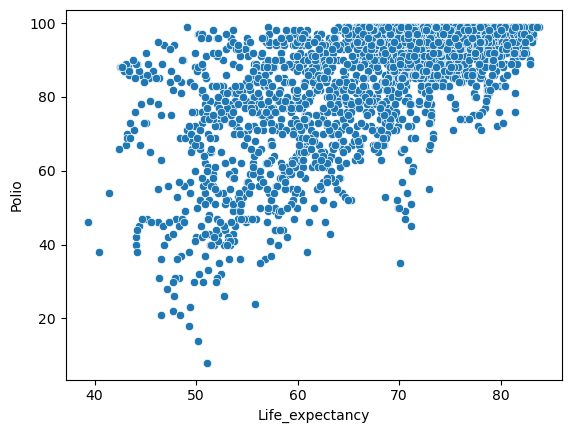

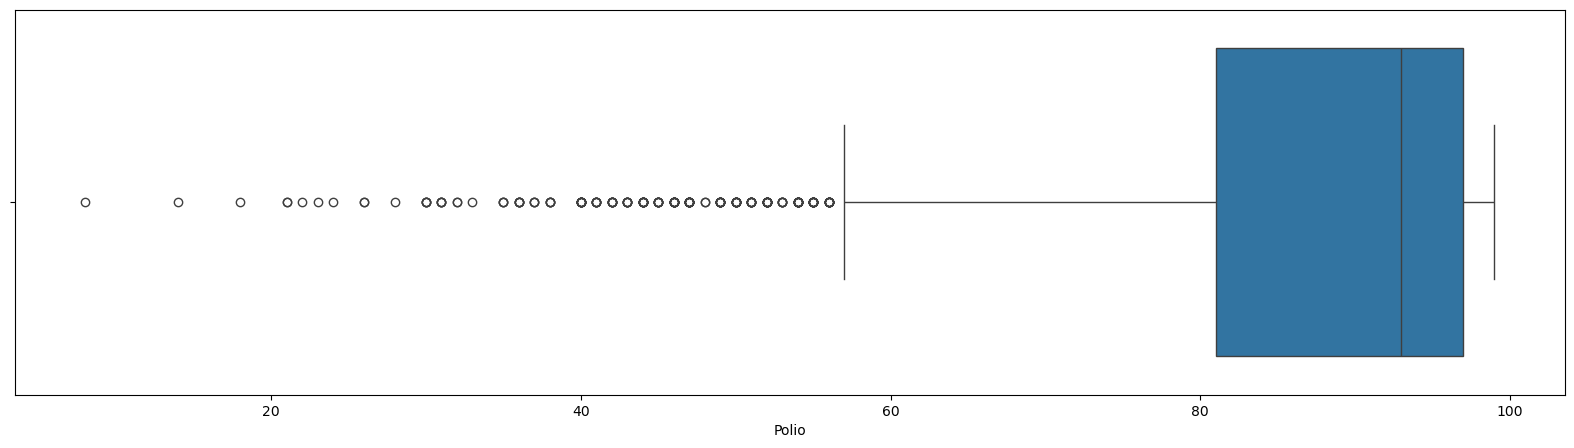

In [17]:
sns.scatterplot(data = df, x = 'Life_expectancy', y= 'Polio')
plt.show()

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Polio'],
            orient = 'h')
plt.show()

### Strong correlation between Diphtheria and Polio 

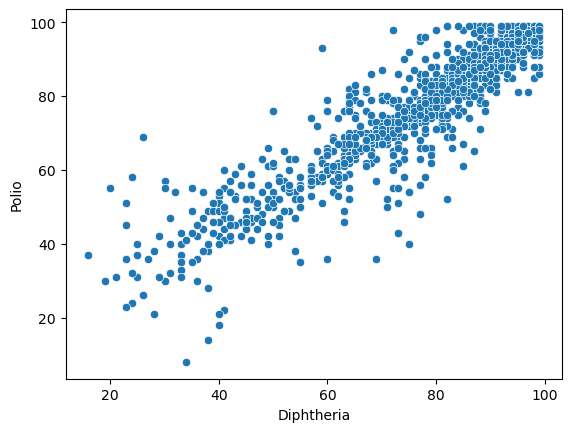

In [232]:
sns.scatterplot(data = df, x= 'Diphtheria', y ='Polio')
plt.show()

### Strong correlation between thinnness of 5-9yrs and 10-19yrs

* Linear relationship
* Some outliers in both variables
* Potential of Multicollinearity

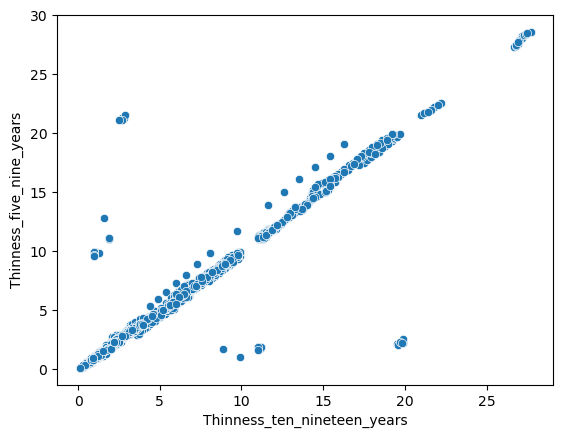

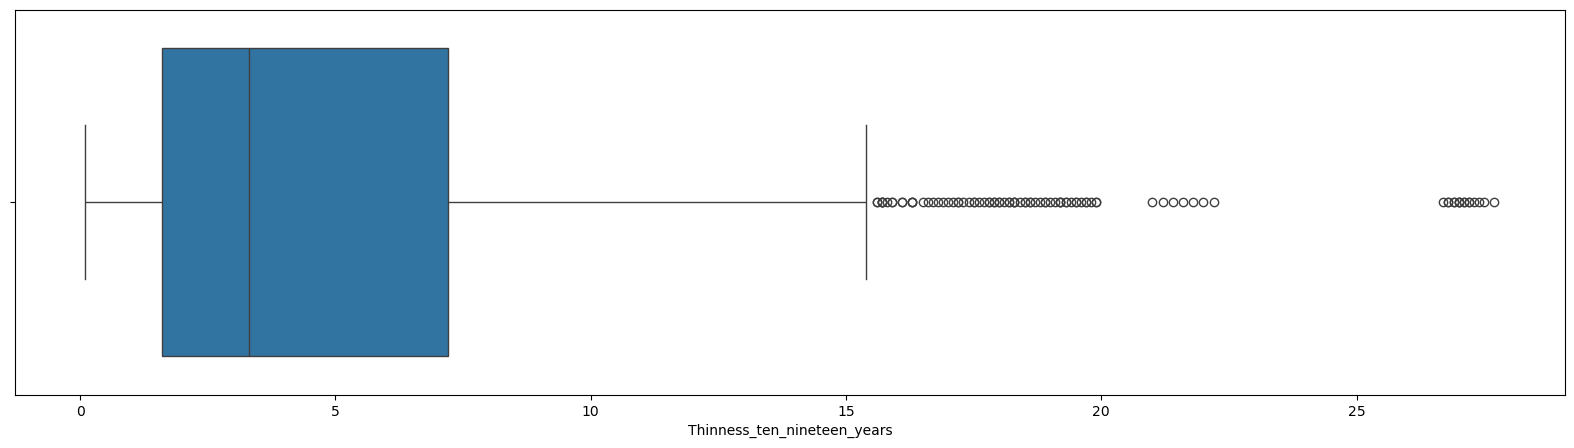

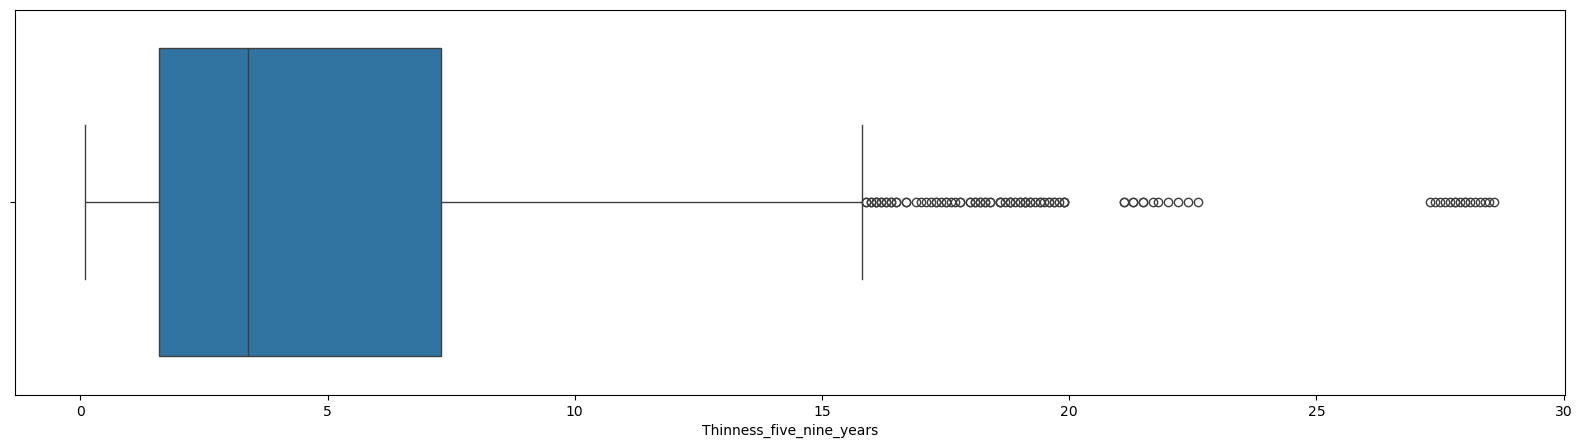

In [20]:
sns.scatterplot(data = df, x ='Thinness_ten_nineteen_years', y= 'Thinness_five_nine_years')
plt.show()

#boxplot thinness 10-19
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Thinness_ten_nineteen_years'],
            orient = 'h')
plt.show()

# boxplot for thinness 5-9
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Thinness_five_nine_years'],
            orient = 'h')
plt.show()